In [44]:
!pip install librosa scikit-learn numpy matplotlib

In [45]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)


In [46]:
!pip install resampy

In [47]:
import os                      # For file paths
import librosa                # For audio processing
import numpy as np            # For numerical operations
import matplotlib.pyplot as plt  # For plotting
from sklearn.model_selection import train_test_split  # For splitting dataset
from sklearn.preprocessing import LabelEncoder        # For converting labels
from sklearn.svm import SVC                           # SVM classifier
from sklearn.metrics import accuracy_score, classification_report  # Metrics

In [48]:
def extract_features(file_path):
    try:
        # Load the audio file
        audio, sample_rate = librosa.load(file_path, res_type='kaiser_fast')

        # Extract MFCC features (13 coefficients)
        mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=13)

        # Take the mean of the MFCC features across time
        mfccs_scaled = np.mean(mfccs.T, axis=0)

        return mfccs_scaled
    except Exception as e:
        print(f"Error processing {file_path}: {e}")
        return None


In [49]:
# Define dataset paths
cry_path = r"D:\cry_dataset(cry_and_notcry)\Dataset\cry"
not_cry_path = r"D:\cry_dataset(cry_and_notcry)\Dataset\not_cry"

features = []
labels = []

# Load cry files
for file in os.listdir(cry_path):
    if file.endswith(".wav"):
        file_path = os.path.join(cry_path, file)
        mfccs = extract_features(file_path)
        if mfccs is not None:
            features.append(mfccs)
            labels.append("baby is crying")

# Load not_cry files
for file in os.listdir(not_cry_path):
    if file.endswith(".wav"):
        file_path = os.path.join(not_cry_path, file)
        mfccs = extract_features(file_path)
        if mfccs is not None:
            features.append(mfccs)
            labels.append("baby is not crying")


In [50]:
# Convert to numpy arrays
X = np.array(features)
y = np.array(labels)

# Encode string labels to integers
le = LabelEncoder()
y_encoded = le.fit_transform(y)  # cry → 0, not_cry → 1 (or vice versa)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)


In [51]:
# Initialize SVM classifier
model = SVC(kernel='linear', probability=True)

# Train the model
model.fit(X_train, y_train)


SVC(kernel='linear', probability=True)

In [52]:
# Predict on test set
y_pred = model.predict(X_test)

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Detailed report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, target_names=le.classes_))

Accuracy: 1.0

Classification Report:

                    precision    recall  f1-score   support

    baby is crying       1.00      1.00      1.00       111
baby is not crying       1.00      1.00      1.00        38

          accuracy                           1.00       149
         macro avg       1.00      1.00      1.00       149
      weighted avg       1.00      1.00      1.00       149



In [53]:
def predict_cry(audio_path):
    mfccs = extract_features(audio_path)
    if mfccs is not None:
        mfccs = mfccs.reshape(1, -1)  # Reshape for model prediction
        prediction = model.predict(mfccs)
        predicted_label = le.inverse_transform(prediction)[0]
        print(f"Prediction: {predicted_label}")
    else:
        print("Could not extract features.")
        
predict_cry(r"D:\cry_dataset(cry_and_notcry)\Dataset\cry\6c.wav")


Prediction: baby is crying


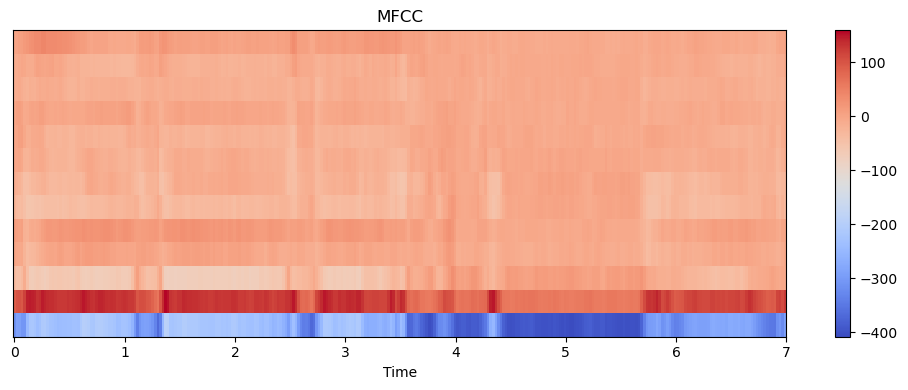

In [54]:
def plot_mfcc(audio_path):
    audio, sr = librosa.load(audio_path)
    mfcc = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=13)
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(mfcc, x_axis='time')
    plt.colorbar()
    plt.title('MFCC')
    plt.tight_layout()
    plt.show()

plot_mfcc(r"D:\cry_dataset(cry_and_notcry)\Dataset\cry\6c.wav")

In [71]:
#real time implementation demo

import sounddevice as sd
import scipy.io.wavfile as wavfile
import time

def record_and_predict(duration=5, fs=22050):
    print("🎙️Recording...")
    recording = sd.rec(int(duration * fs), samplerate=fs, channels=1, dtype='float32')
    sd.wait()

    file_path = "live_test.wav"
    wavfile.write(file_path, fs, recording)

    # Predict
    predict_cry(file_path)

In [73]:
record_and_predict()

🎙️Recording...
Prediction: baby is crying
